In [1]:
from tools import *

cfg = EasyDict(
    target = 'General trash',
    anno_path = '../../dataset/train.json',
    output_path = './output/statistics.txt',
    classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
            "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"],
    hist_width = 1000,
    hist_height = 400
)
df,dct = load(cfg)
t_df = df[df.class_name == cfg.target]
t_bbox_df = convert_to_bbox(t_df)
sample(t_df, 3), df.shape, t_df.shape

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


,image_id,image_name,class_name,class_id,x_min,y_min,x_max,y_max
21429,4495,train/4485.jpg,General trash,0,308.0,151.0,415.0,292.0
321,65,train/0065.jpg,General trash,0,374.0,582.0,750.0,684.0
5614,1155,train/1155.jpg,General trash,0,494.0,38.0,745.0,99.0


(None, (23412, 8), (4206, 8))

In [10]:
from scipy.stats import norm
import numpy as np 

def ci_ratio(bbox_df, alpha=0.05):
    row_mean = bbox_df.aspect_ratio.mean()
    data = np.log(bbox_df.groupby('image_id').aspect_ratio.mean()) # 0 ~ oo -> -oo ~ oo
    mu = data.mean()
    std = data.std()
    z = norm.ppf(1-alpha/2)
    ci = (round(np.exp(mu-z*std), 4), round(np.exp(mu+z*std), 4))
    return round(row_mean, 2), round(np.exp(mu), 2), ci
    
for cls_name in cfg.classes:
    t_df = df[df.class_name == cls_name]
    t_bbox_df = convert_to_bbox(t_df)
    print(cls_name, ci_ratio(t_bbox_df, alpha=0.05)) 

General trash (1.45, 1.13, (0.3251, 3.9449))
Paper (1.39, 1.18, (0.4489, 3.0976))
Paper pack (1.3, 1.12, (0.504, 2.4901))
Metal (1.23, 1.03, (0.3608, 2.94))
Glass (1.04, 0.86, (0.2292, 3.2602))
Plastic (1.3, 1.09, (0.3558, 3.3545))
Styrofoam (1.48, 1.17, (0.4256, 3.2182))
Plastic bag (1.11, 1.02, (0.3929, 2.6501))
Battery (1.43, 1.2, (0.3017, 4.8061))
Clothing (1.21, 1.07, (0.3555, 3.2019))


In [ ]:
# ratio -> 전부 가로가 세로보다 길게 나타남.
# 100개를 뽑았을 때 80개가 포함되는 범위로 ratio를 설정해보자.
# -> (min, mean, max)
# 일반쓰레기의 경우 너무 분산이 크다. 일반쓰레기의 ratio 분포를 그려보자.

,image_id,image_name,class_name,class_id,x_min,y_min,x_max,y_max
17738,3732,train/3722.jpg,General trash,0,300.0,653.0,791.0,671.0
17739,3732,train/3722.jpg,General trash,0,770.0,616.0,794.0,654.0
17741,3732,train/3722.jpg,General trash,0,300.0,602.0,797.0,620.0


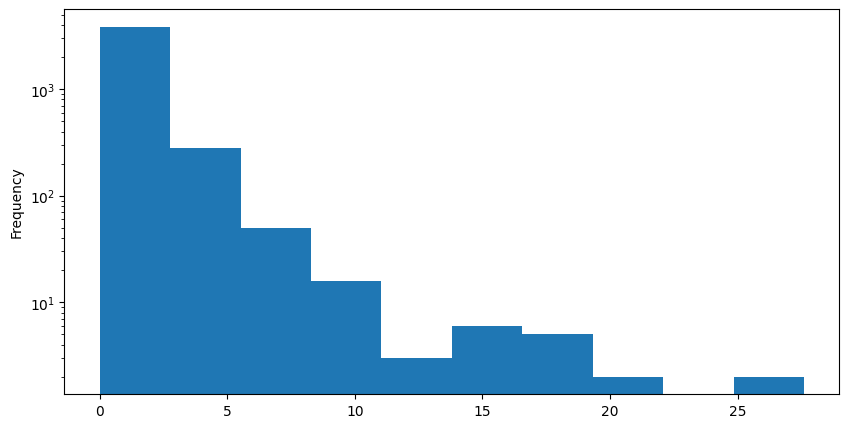

In [52]:
t_df = df[df.class_name == 'General trash']
t_bbox_df = convert_to_bbox(t_df)
t_bbox_df.aspect_ratio.plot(kind='hist', figsize=(10, 5), logy=True)
t_bbox_df.aspect_ratio.describe()
t_bbox_df[t_bbox_df.aspect_ratio > 27]
t_df[t_df.image_id == 3732]